#Successfully Done BW image

In [ ]:

import torchvision
import torch
# use deeplabv3_resnet50 instead of resnet101 to reduce the model size
weights=torchvision.models.segmentation.DeepLabV3_ResNet50_Weights.DEFAULT
model=torchvision.models.segmentation.deeplabv3_resnet50(weights=weights)
model.eval()

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


  0%|          | 0.00/161M [00:00<?, ?B/s]

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
from PIL import Image
from torchvision import transforms
input_image = Image.open('side.jpg')
input_image = input_image.convert("RGB")
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]

# output_predictions = output_softmax.argmax(0)
output_predictions=output.argmax(0)
print(output_predictions.shape)

torch.Size([1280, 720])


<PIL.Image.Image image mode=1 size=720x1280 at 0x7FEC4B4D28B0>


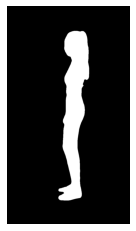

In [ ]:
# create a color pallette, selecting a color for each class
import cv2
cpu_out=output_predictions.cpu().numpy()
mask = cpu_out == 15
r = Image.fromarray(mask).resize(input_image.size)

import matplotlib.pyplot as plt
plt.imshow(r)
plt.axis(False)
print(r)
r.save('side_out.png')
# plt.show()

In [ ]:
!pip install smpl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 7.6 MB/s eta 0:00:00


In [ ]:
import smpl
smpl.__version__

'1.2.1'

In [ ]:
!pip install nomo_3d_400_scans


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement nomo_3d_400_scans (from versions: none)
ERROR: No matching distribution found for nomo_3d_400_scans
